# Deep Hedging
## Testing the SimpleWorld_Spot_ATM world generator

Simple World with one asset and one floating ATM option.
    The asset has stochastic volatility, and a mean-reverting drift.
    The implied volatility of the asset is not the realized volatility.

In [1]:
""" Slighly annoying: by default the SageMaker Python import directory does not include our git directory """
import os
p = os.getcwd()
dhn = "/deephedging/"
i = p.find(dhn)
if i!=-1:
    p = p[:i]
    import sys
    sys.path.append(p)
    print("SageMaker: added python path %s" % p)

SageMaker: added python path /Users/zihao/Documents/GitHub


## Simple Black & Scholes World

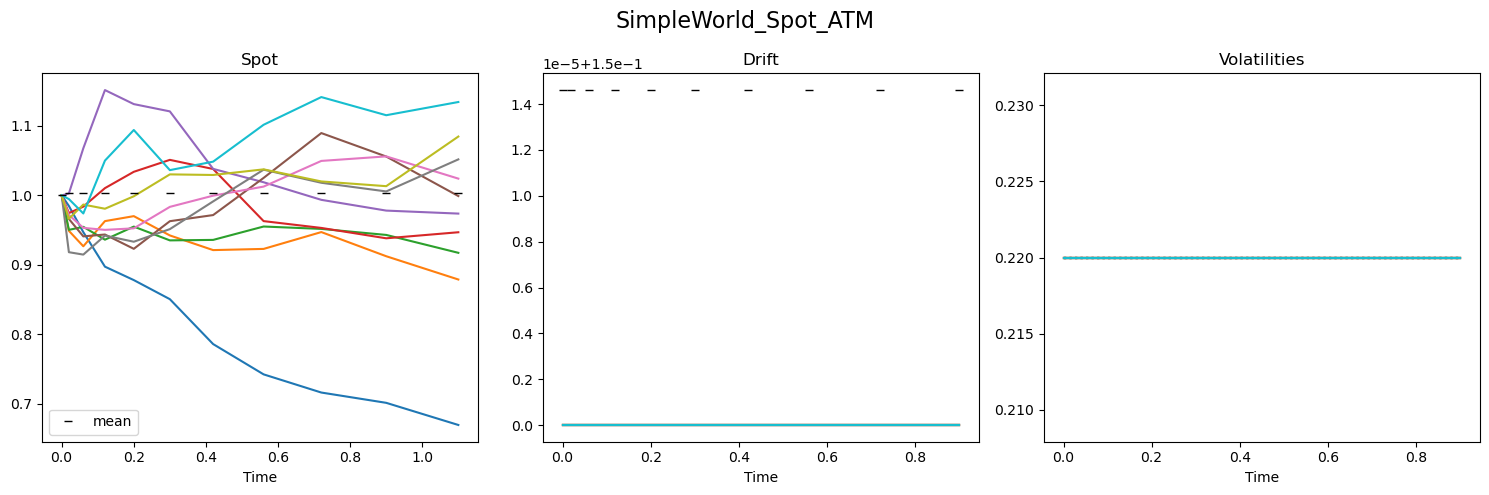

Config settings:
config['black_scholes'] = True
config['drift'] = 0.15
config['rvol'] = 0.22
config['samples'] = 10000



In [50]:
import numpy as np
from IPython.display import display, Markdown, Latex

from deephedging.world import SimpleWorld_Spot_ATM
from cdxbasics.config import Config  # pip install

# remove for production code. Keep while developping
import imp
import deephedging.world as _
imp.reload(_)

display(Markdown("## Simple Black & Scholes World"))
config = Config()
config.samples = 10000
config.black_scholes = True
config.drift = 0.15  # drift
config.rvol = 0.22   # volatility
        
world  = SimpleWorld_Spot_ATM( config )
world.plot(plot_samples=10)

In [40]:
world.tf_data["market"]["hedges"]

<tf.Tensor: shape=(10000, 10, 1), dtype=float32, numpy=
array([[[-0.33087736],
        [-0.31561553],
        [-0.27788085],
        ...,
        [-0.07292753],
        [-0.04675072],
        [-0.03190893]],

       [[-0.31147212],
        [-0.27902782],
        [-0.24041921],
        ...,
        [-0.09398556],
        [-0.06375551],
        [-0.0174349 ]],

       [[-0.30900294],
        [-0.2404784 ],
        [-0.20146364],
        ...,
        [-0.10834116],
        [-0.06623518],
        [-0.03967029]],

       ...,

       [[ 0.4116341 ],
        [ 0.39982152],
        [ 0.39743757],
        ...,
        [ 0.14825845],
        [ 0.09204328],
        [ 0.02219999]],

       [[ 0.42718136],
        [ 0.35812938],
        [ 0.35140836],
        ...,
        [ 0.06993103],
        [ 0.04834867],
        [ 0.02485061]],

       [[ 0.4649681 ],
        [ 0.3992195 ],
        [ 0.38000882],
        ...,
        [ 0.2042942 ],
        [ 0.13891423],
        [-0.02078021]]], dtype=float32

In [68]:
world.tf_data["market"]

{'hedges': <tf.Tensor: shape=(10000, 10, 1), dtype=float32, numpy=
 array([[[-0.33087736],
         [-0.31561553],
         [-0.27788085],
         ...,
         [-0.07292753],
         [-0.04675072],
         [-0.03190893]],
 
        [[-0.31147212],
         [-0.27902782],
         [-0.24041921],
         ...,
         [-0.09398556],
         [-0.06375551],
         [-0.0174349 ]],
 
        [[-0.30900294],
         [-0.2404784 ],
         [-0.20146364],
         ...,
         [-0.10834116],
         [-0.06623518],
         [-0.03967029]],
 
        ...,
 
        [[ 0.4116341 ],
         [ 0.39982152],
         [ 0.39743757],
         ...,
         [ 0.14825845],
         [ 0.09204328],
         [ 0.02219999]],
 
        [[ 0.42718136],
         [ 0.35812938],
         [ 0.35140836],
         ...,
         [ 0.06993103],
         [ 0.04834867],
         [ 0.02485061]],
 
        [[ 0.4649681 ],
         [ 0.3992195 ],
         [ 0.38000882],
         ...,
         [ 0.2042942 ],
   

In [42]:
0.9470035-0.9847382

-0.03773470000000001

In [43]:
world.tf_data["features"]["per_step"]["price"]

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[1.        , 0.9847382 , 0.9470035 , ..., 0.7420502 , 0.71587336,
        0.70103157],
       [1.        , 0.9675557 , 0.9289471 , ..., 0.78251344, 0.7522834 ,
        0.7059628 ],
       [1.        , 0.93147546, 0.8924607 , ..., 0.7993382 , 0.75723225,
        0.73066735],
       ...,
       [1.        , 1.0118126 , 1.0141965 , ..., 1.2633756 , 1.3195908 ,
        1.3894341 ],
       [1.        , 1.069052  , 1.075773  , ..., 1.3572503 , 1.3788327 ,
        1.4023308 ],
       [1.        , 1.0657486 , 1.0849593 , ..., 1.2606739 , 1.3260539 ,
        1.4857483 ]], dtype=float32)>

In [69]:
world.tf_data["features"]["per_step"]

{'cost': <tf.Tensor: shape=(10000, 10, 1), dtype=float32, numpy=
 array([[[0.0002    ],
         [0.00019695],
         [0.0001894 ],
         ...,
         [0.00014841],
         [0.00014317],
         [0.00014021]],
 
        [[0.0002    ],
         [0.00019351],
         [0.00018579],
         ...,
         [0.0001565 ],
         [0.00015046],
         [0.00014119]],
 
        [[0.0002    ],
         [0.0001863 ],
         [0.00017849],
         ...,
         [0.00015987],
         [0.00015145],
         [0.00014613]],
 
        ...,
 
        [[0.0002    ],
         [0.00020236],
         [0.00020284],
         ...,
         [0.00025268],
         [0.00026392],
         [0.00027789]],
 
        [[0.0002    ],
         [0.00021381],
         [0.00021515],
         ...,
         [0.00027145],
         [0.00027577],
         [0.00028047]],
 
        [[0.0002    ],
         [0.00021315],
         [0.00021699],
         ...,
         [0.00025213],
         [0.00026521],
         [0.0002

In [55]:
world.tf_data['market']['hedges']

<tf.Tensor: shape=(10000, 10, 1), dtype=float32, numpy=
array([[[-0.33087736],
        [-0.31561553],
        [-0.27788085],
        ...,
        [-0.07292753],
        [-0.04675072],
        [-0.03190893]],

       [[-0.31147212],
        [-0.27902782],
        [-0.24041921],
        ...,
        [-0.09398556],
        [-0.06375551],
        [-0.0174349 ]],

       [[-0.30900294],
        [-0.2404784 ],
        [-0.20146364],
        ...,
        [-0.10834116],
        [-0.06623518],
        [-0.03967029]],

       ...,

       [[ 0.4116341 ],
        [ 0.39982152],
        [ 0.39743757],
        ...,
        [ 0.14825845],
        [ 0.09204328],
        [ 0.02219999]],

       [[ 0.42718136],
        [ 0.35812938],
        [ 0.35140836],
        ...,
        [ 0.06993103],
        [ 0.04834867],
        [ 0.02485061]],

       [[ 0.4649681 ],
        [ 0.3992195 ],
        [ 0.38000882],
        ...,
        [ 0.2042942 ],
        [ 0.13891423],
        [-0.02078021]]], dtype=float32

In [67]:
print( config.usage_report() )


config['black_scholes'] = True # Hard overwrite to use a black & scholes model with vol 'rvol' and drift 'drift'. Also turns off the option as a tradable instrument by setting strike = 0; default: False
config['corr_ms'] = 0.5 # Correlation between the asset and its mean; default: 0.5
config['corr_vi'] = 0.8 # Correlation between the implied vol and the asset volatility; default: 0.8
config['corr_vs'] = -0.7 # Correlation between the asset and its volatility; default: -0.7
config['cost_p'] = 0.0005 # Trading cost for the option on top of delta and vega cost; default: 0.0005
config['cost_s'] = 0.0002 # Trading cost spot; default: 0.0002
config['cost_v'] = 0.02 # Trading cost vega; default: 0.02
config['drift'] = 0.15 # Mean drift of the asset. This is the total drift; default: 0.1
config['drift_vol'] = 0.1 # Vol of the drift; default: 0.1
config['dt'] = 0.02 # Time per timestep; default: One week (1/50)
config['invar_steps'] = 5 # Number of steps ahead to sample from invariant distribut

## Stochastic Vol, Drift, Option trading

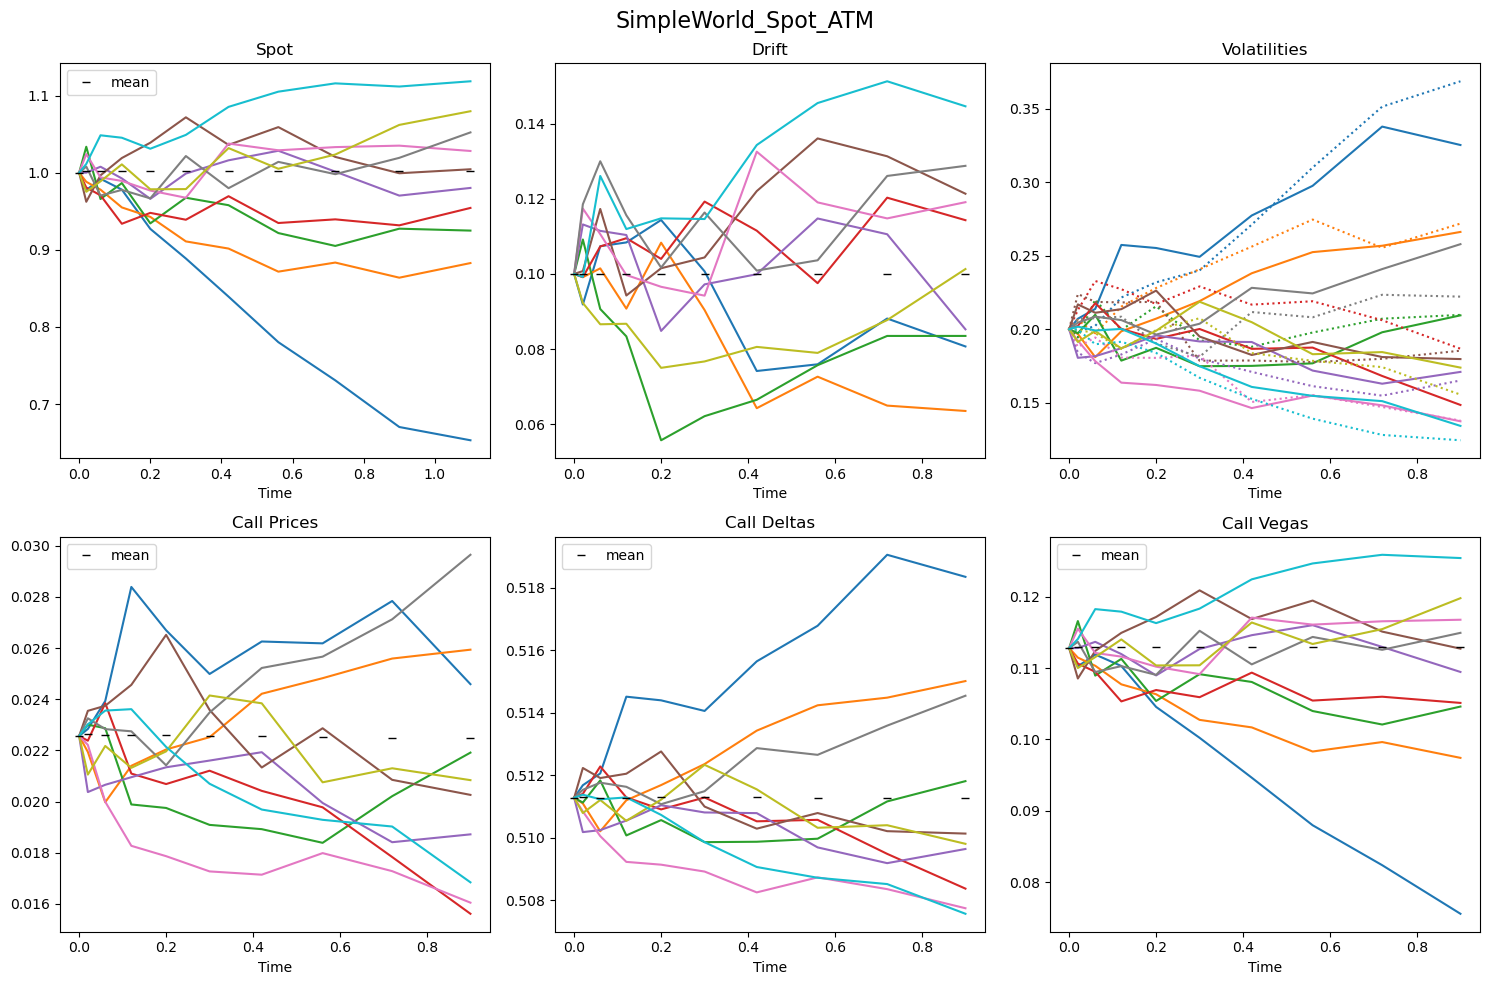

Config settings:
config['black_scholes'] = False
config['invar_steps'] = 0
config['samples'] = 10000



In [48]:
config = Config()
config.samples = 10000
config.black_scholes = False
config.invar_steps = 0
world  = SimpleWorld_Spot_ATM( config )
world.plot(plot_samples=10)

## Stochastic Vol, Drift, Option trading; in the 'invariant' distribution

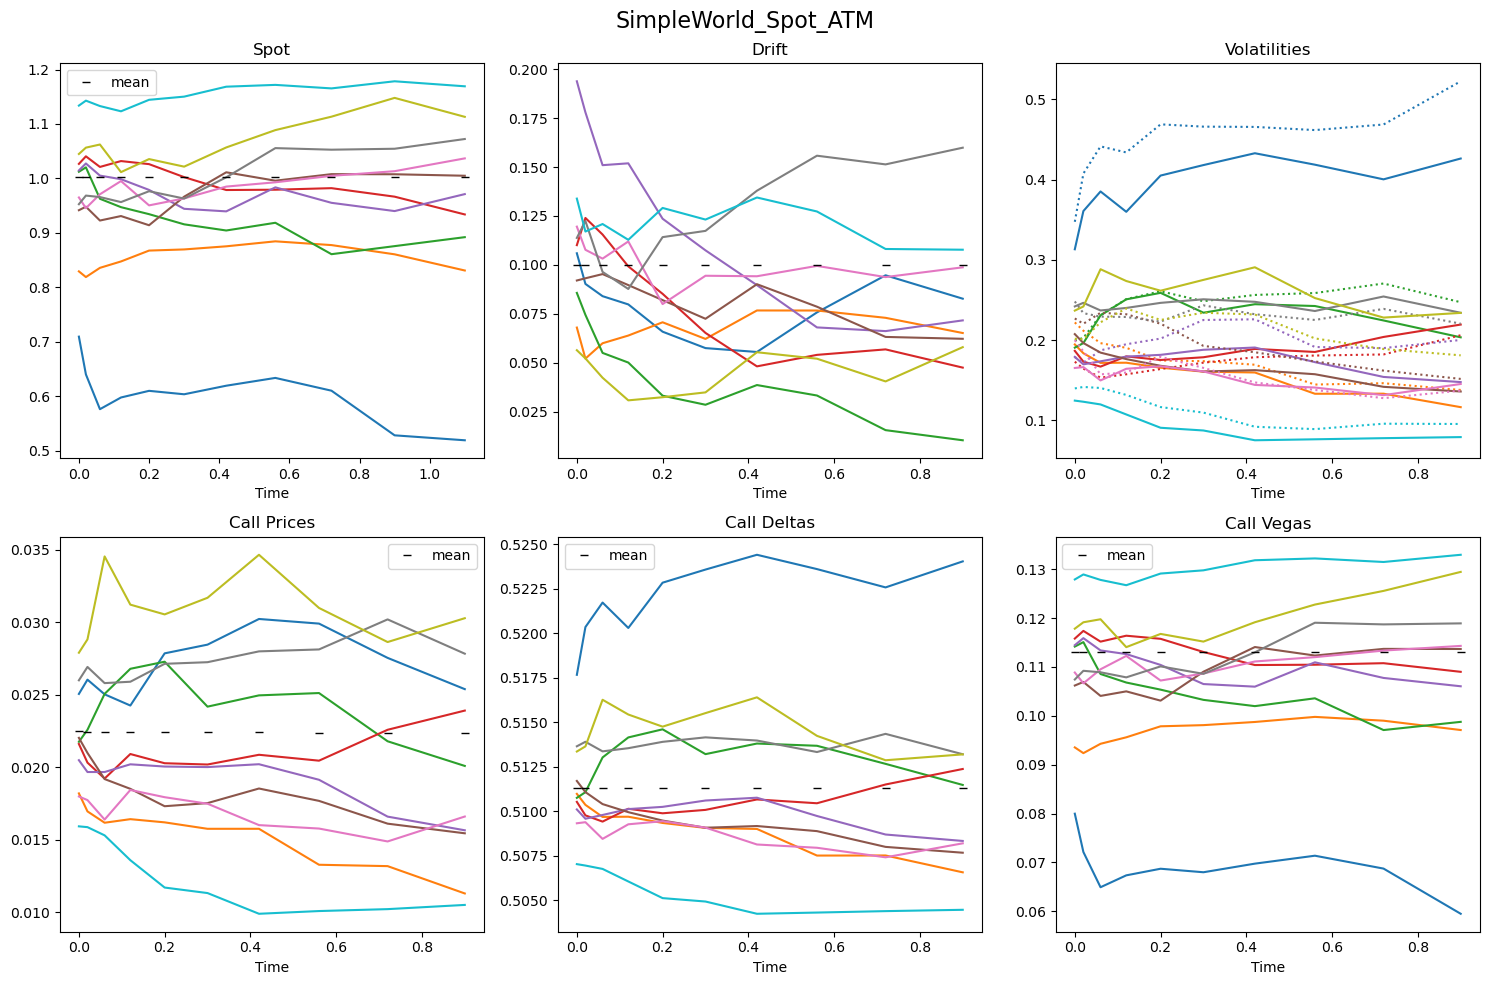

Config settings:
config['black_scholes'] = False
config['invar_steps'] = 10
config['samples'] = 10000



In [4]:
config = Config()
config.samples = 10000
config.black_scholes = False
config.invar_steps = 10
world  = SimpleWorld_Spot_ATM( config )
world.plot(plot_samples=10)